In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [112]:
df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/LoanStats3d.csv', sep=',', header=1)

In [113]:
clean_df = df.copy()
clean_df['id'] = pd.to_numeric(df['id'], errors='coerce')
clean_df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
clean_df.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

clean_df = clean_df[:-2]

In [114]:
len(clean_df.id.unique())
# These are unique IDs and don't help

421095

In [115]:
for i in range(len(clean_df)):
    if clean_df.loan_amnt[i] != clean_df.funded_amnt[i]:
        print(i)
# they're the same!
# funded_amnt_inv is not the same though.

In [116]:
clean_df.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [117]:
clean_df.policy_code.unique()

array([1.])

In [118]:
if 'id' in clean_df.columns:
    clean_df.drop('id', 1, inplace=True)
if 'funded_amnt' in clean_df.columns:
    clean_df.drop('funded_amnt', 1, inplace=True)
if 'funded_amnt_inv' in clean_df.columns:
    clean_df.drop('funded_amnt_inv', 1, inplace=True)
if 'out_prncp_inv' in clean_df.columns:
    clean_df.drop('out_prncp_inv', 1, inplace=True)
if 'total_pymnt_inv' in clean_df.columns:
    clean_df.drop('total_pymnt_inv', 1, inplace=True)
if 'policy_code' in clean_df.columns:
    clean_df.drop('policy_code', 1, inplace=True)

In [119]:
clean_df.loan_status.unique()
for i in range(len(clean_df.loan_status.unique())):
    clean_df['loan_status' + clean_df.loan_status.unique()[i]] = pd.get_dummies(clean_df.loan_status).iloc[:,i]

In [120]:
for i in clean_df.loan_status.unique():
    print(i, len(clean_df.loan_status[clean_df.loan_status == i]))

Current 287414
Fully Paid 87989
Charged Off 29178
Late (31-120 days) 9510
In Grace Period 4320
Default 796
Late (16-30 days) 1888


In [128]:
dummy_df = pd.get_dummies(clean_df)

In [122]:
x = dummy_df.corr()

In [123]:
good_vars = []
for j in range(40):
    for i in range(len(x.loc['loan_statusCurrent'])):
        if x.loc['loan_statusCurrent'][i] == sorted(x.loc['loan_statusCurrent'])[j]:
            good_vars.append(x.index.values[i])

In [124]:
active_df = dummy_df[good_vars].copy()
active_df['loan_status'] = clean_df['loan_status'].copy()
active_df.drop(active_df.columns[:6], 1, inplace=True)

In [125]:
rfc = ensemble.RandomForestClassifier()
X = active_df.drop('loan_status', 1)
Y = active_df['loan_status']
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.72178291, 0.72130797, 0.72137921, 0.54126   , 0.72175255,
       0.175564  , 0.7217222 , 0.7216747 , 0.72170898, 0.72136988])

In [134]:
for i in dummy_df:
    if len(dummy_df[dummy_df[i] == dummy_df[i]]) < 421095:
        dummy_df.drop(i,1,inplace=True)

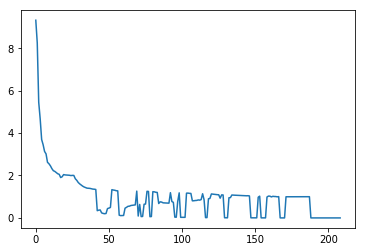

[ 9.31606020e+00+0.00000000e+00j  8.24552323e+00+0.00000000e+00j
  5.45074053e+00+0.00000000e+00j  4.67105780e+00+0.00000000e+00j
  3.69420251e+00+0.00000000e+00j  3.45281655e+00+0.00000000e+00j
  3.13232140e+00+0.00000000e+00j  3.01879655e+00+0.00000000e+00j
  2.62028886e+00+0.00000000e+00j  2.55198849e+00+0.00000000e+00j
  2.45354250e+00+0.00000000e+00j  2.32283526e+00+0.00000000e+00j
  2.22511057e+00+0.00000000e+00j  2.19240466e+00+0.00000000e+00j
  2.13700855e+00+0.00000000e+00j  2.08145757e+00+0.00000000e+00j
  2.05428272e+00+0.00000000e+00j  1.90263586e+00+0.00000000e+00j
  1.93927507e+00+0.00000000e+00j  2.04174434e+00+0.00000000e+00j
  2.02684877e+00+0.00000000e+00j  2.02165269e+00+0.00000000e+00j
  2.01540078e+00+0.00000000e+00j  2.01002355e+00+0.00000000e+00j
  1.99568969e+00+0.00000000e+00j  2.00441139e+00+0.00000000e+00j
  2.00094498e+00+0.00000000e+00j  1.84616612e+00+0.00000000e+00j
  1.77192069e+00+0.00000000e+00j  1.66998321e+00+0.00000000e+00j
  1.60464818e+00+0.000000

In [136]:
X = StandardScaler().fit_transform(dummy_df)
Xt = X.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

In [141]:
len(Xt[0])

421095

In [167]:
PCA_df = pd.DataFrame()
for i in range(14):
    PCA_df['PCA' + str(i)] = Xt[i]
PCA_df['loan_status'] = clean_df['loan_status']

In [168]:
rfc = ensemble.RandomForestClassifier()
X = PCA_df.drop('loan_status', 1)
Y = PCA_df['loan_status']

cross_val_score(rfc, X, Y, cv=10)

array([0.95784949, 0.96445109, 0.96316877, 0.96155399, 0.96067442,
       0.96069817, 0.96093472, 0.95986606, 0.95981666, 0.95896072])